In [6]:
!pip install kaggle

In [1]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [1]:
!ls

anr.jpg  data  dish.png  face-mask-dataset.zip	kaggle.json  models  sample_data


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten ,Dense ,Dropout ,BatchNormalization
from tensorflow.keras.optimizers import Adamax

from tensorflow.keras.utils import plot_model #for model visualization

In [3]:
data_with_mask_dir = '/content/data/with_mask'
data_without_mask_dir = '/content/data/without_mask'

In [4]:
data_with_mask = os.listdir(data_with_mask_dir)[:5]
data_without_mask = os.listdir(data_without_mask_dir)[:5]

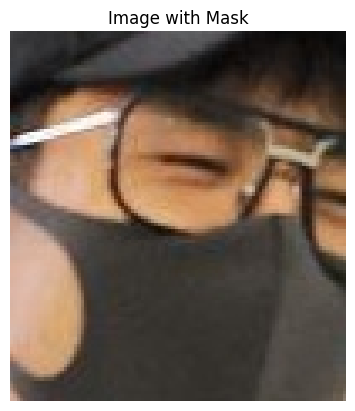

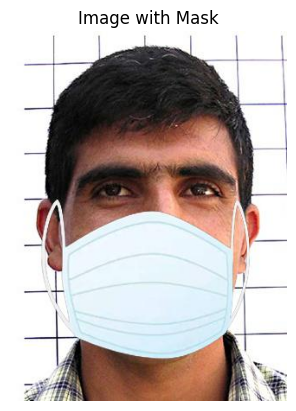

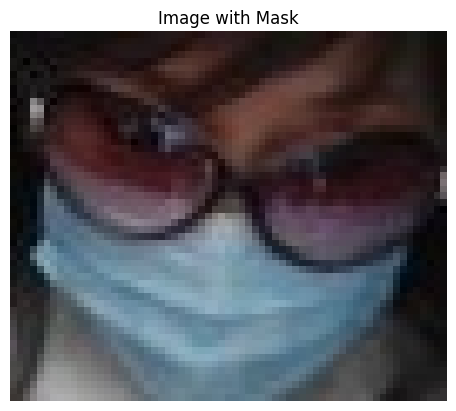

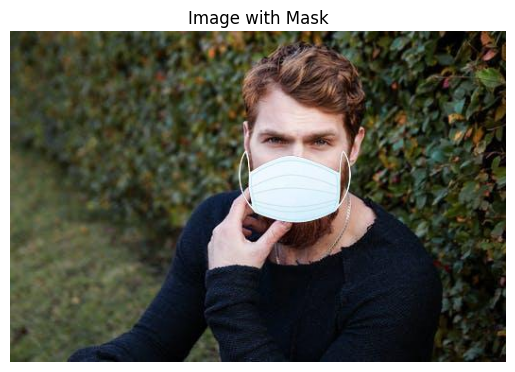

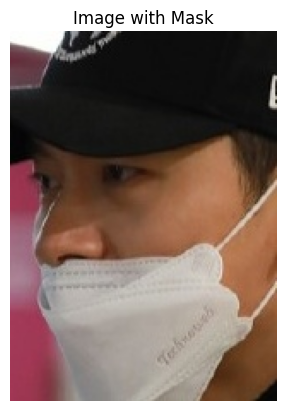

In [5]:
for img_file in data_with_mask:
    img_path = os.path.join(data_with_mask_dir, img_file)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title('Image with Mask')
    plt.axis('off')
    plt.show()

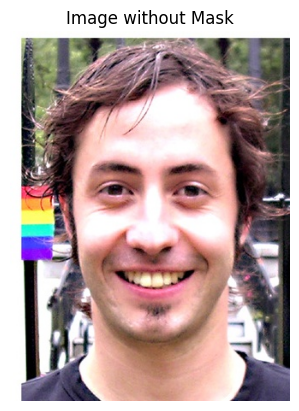

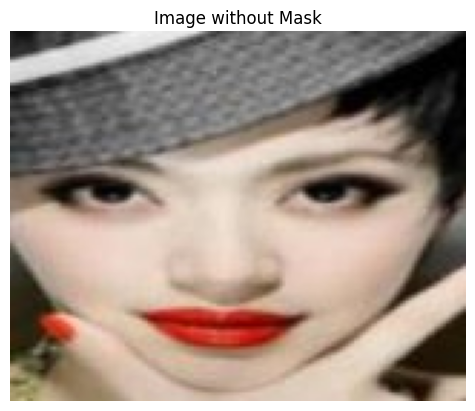

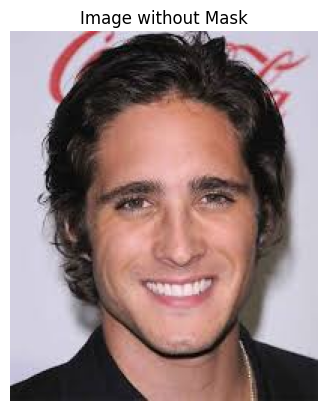

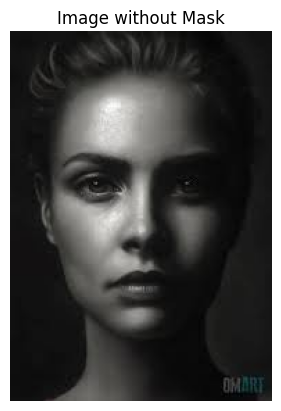

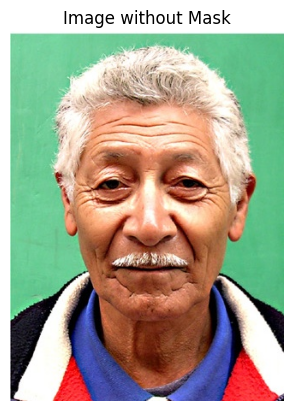

In [6]:
for img_file in data_without_mask:
    img_path = os.path.join(data_without_mask_dir, img_file)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title("Image without Mask")
    plt.axis('off')
    plt.show()

In [7]:
data_with_mask = os.listdir(data_with_mask_dir)
data_without_mask = os.listdir(data_without_mask_dir)

In [8]:
print("Number of with mask image :- ", len(data_with_mask))


Number of with mask image :-  3725


In [9]:
print("Number of without mask image :- ", len(data_without_mask))


Number of without mask image :-  3828


In [10]:
with_mask_labels = [1]*len(data_with_mask)
print(f"with mask lebels", with_mask_labels[0:10])
without_mask_labels = [0]*len(data_without_mask)
print(f"without mask labels", without_mask_labels[0:10])

with mask lebels [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
without mask labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
labels = with_mask_labels+without_mask_labels
print(f"labels", labels[0:10])
print(f"labels", labels[-10:])

labels [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
images = []
def load_images_from_folder(folder):
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        img = img.resize((128,128))
        img = img.convert('RGB')
        images.append(np.array(img))
    return images
with_mask_images = load_images_from_folder("/content/data/with_mask")
without_mask_images = load_images_from_folder("/content/data/without_mask")

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
len(images)


7553

In [14]:
images[0].shape

(128, 128, 3)

In [15]:
x = np.array(images)
y = np.array(labels)

In [16]:
print(x.shape)

(7553, 128, 128, 3)


In [17]:
y.shape

(7553,)

In [18]:
print(y.shape)

(7553,)


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [20]:
print(f"shape of x_trian is: {x_train.shape}")
print(f"shape of y_train_is: {y_train.shape}")
print(f"shape of x_test_is: {x_test.shape}")
print(f"shape of y_test_is: {y_test.shape}")

shape of x_trian is: (5287, 128, 128, 3)
shape of y_train_is: (5287,)
shape of x_test_is: (2266, 128, 128, 3)
shape of y_test_is: (2266,)


In [21]:
x_train = x_train/255
x_test = x_test/255

In [27]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

image_size = (128,128)
channels = 3

image_shape = (image_size[0], image_size[1], channels)

base_model = tf.keras.applications.ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=image_shape)
model = Sequential ([
    base_model,
    Flatten(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(rate=0.2),
    BatchNormalization(),
    Dense(128, activation ='relu'),
    Dropout(rate=0.2),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(rate=0.2),
    Dense(2, activation = 'sigmoid')
])

In [28]:
model.compile(Adamax(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [31]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Define your model
image_size = (128, 128)
channels = 3
image_shape = (image_size[0], image_size[1], channels)

base_model = tf.keras.applications.ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=image_shape)

model = Sequential([
    base_model,
    Flatten(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(rate=0.2),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(rate=0.2),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(rate=0.2),
    Dense(2, activation='sigmoid')  # Two units for binary classification
])

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='binary_crossentropy',  # Use binary crossentropy for binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_one_hot, epochs=5, validation_split=0.1)


Epoch 1/5
149/149 [==============================] - 154s 353ms/step - loss: 0.1735 - accuracy: 0.9367 - val_loss: 0.5282 - val_accuracy: 0.9112
Epoch 2/5
149/149 [==============================] - 43s 291ms/step - loss: 0.0699 - accuracy: 0.9800 - val_loss: 0.0278 - val_accuracy: 0.9962
Epoch 3/5
149/149 [==============================] - 45s 302ms/step - loss: 0.0576 - accuracy: 0.9823 - val_loss: 0.0358 - val_accuracy: 0.9905
Epoch 4/5
149/149 [==============================] - 44s 294ms/step - loss: 0.0318 - accuracy: 0.9914 - val_loss: 0.0365 - val_accuracy: 0.9943
Epoch 5/5
149/149 [==============================] - 45s 302ms/step - loss: 0.0307 - accuracy: 0.9926 - val_loss: 0.0389 - val_accuracy: 0.9868


In [33]:
loss, accuracy = model.evaluate(x_test, y_test_one_hot)
print('Test Accuracy =', accuracy )

71/71 [==============================] - 8s 107ms/step - loss: 0.0364 - accuracy: 0.9872
Test Accuracy = 0.9872021079063416


In [35]:
from sklearn.metrics import classification_report

# Predict probabilities for each class
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Generate classification report
print(classification_report(y_test, y_pred_labels))


71/71 [==============================] - 6s 82ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1134
           1       0.99      0.99      0.99      1132

    accuracy                           0.99      2266
   macro avg       0.99      0.99      0.99      2266
weighted avg       0.99      0.99      0.99      2266



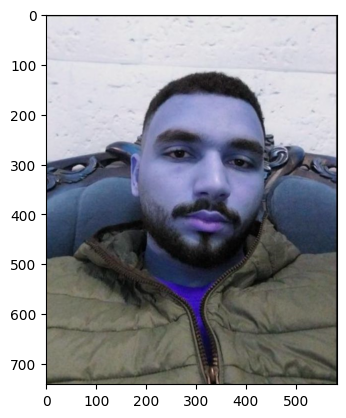

1/1 [==============================] - 2s 2s/step
[[0.9884266  0.00723975]]
0
The person in the image is not wearing a mask


In [36]:
input_image_path = "/content/dish.png"
input_image = cv2.imread(input_image_path)
plt.imshow(input_image)
plt.show()
input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped =np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
    print("The person in the image is wearing a mask")
else:
    print("The person in the image is not wearing a mask")

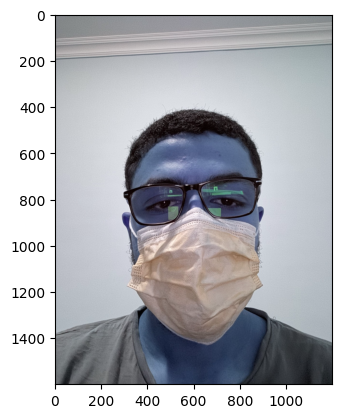

1/1 [==============================] - 0s 63ms/step
[[0.06876738 0.9407957 ]]
1
The person in the image is wearing a mask


In [37]:
input_image_path = "/content/anr.jpg"
input_image = cv2.imread(input_image_path)
plt.imshow(input_image)
plt.show()
input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
    print("The person in the image is wearing a mask")

else:
    print("The person in the image in not wearing a mask")

In [38]:
#load load model
from tensorflow.keras.models import load_model

In [39]:
# to save model
model.save(os.path.join('models', 'Fin_MASK_ResNet-152v2model.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


71/71 [==============================] - 6s 82ms/step
Accuracy: 0.9872
Precision: 0.9876
Recall: 0.9867
F1 Score: 0.9872


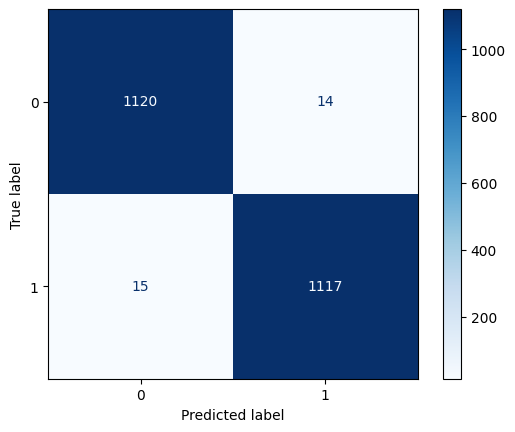

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Get the ground truth labels for the test set
y_true = y_test

# Get the predicted labels for the test set
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Compute and display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # Use integer labels (0 and 1)
disp.plot(cmap=plt.cm.Blues)
plt.show()
